# Assignment - Neural Networks
This assignment is for Big Data in Finance II.

# 0 Setup
Download the stock data saved on the hub as */Data/stocks_presentations/Stocks_data.csv*.

Table below presents interpretations of the variables included.

<table class="table table-bordered table-striped table-condensed">
   <tr>
      <th style = "text-align : left">Purpose</th>
      <th style = "text-align : left">Variable</th>
      <th style = "text-align : left">Description</th>
   </tr>
   <tr>
      <td style = "text-align : left" rowspan = 5>Panel </td>
   </tr>
   <tr>
      <td style = "text-align : left">GVKEY</td>
      <td style = "text-align : left">Unique Identifier</td>
   </tr>
   <tr>
      <td style = "text-align : left">tic</td>
      <td style = "text-align : left">Ticker</td>
   </tr>
   <tr>
      <td style = "text-align : left">cusip</td>
      <td style = "text-align : left">Unique Identifier</td>
   </tr>
   <tr>
      <td style = "text-align : left">conm</td>
      <td style = "text-align : left">Company name </td>
   </tr>
   <tr>
      <td style = "text-align : left" rowspan = 4>Time Series</td>
   </tr>
   <tr>
      <td style = "text-align : left">datadate</td>
      <td style = "text-align : left">Data date</td>
   </tr>
   <tr>
      <td style = "text-align : left">year</td>
      <td style = "text-align : left">Year</td>
   </tr>
   <tr>
      <td style = "text-align : left">yearmonth</td>
      <td style = "text-align : left">Year and Month</td>
   </tr>
   <tr>
      <td style = "text-align : left" rowspan = 4>Returns</td>
   </tr>
   <tr>
      <td style = "text-align : left">dvpspm</td>
      <td style = "text-align : left">Dividends per Share</td>
   </tr>
   <tr>
      <td style = "text-align : left">prccm</td>
      <td style = "text-align : left">Price - Close - Monthly</td>
   </tr>
   <tr>
      <td style = "text-align : left">trt1m</td>
      <td style = "text-align : left">Monthly Total Return</td>
   </tr>
   <tr>
      <td style = "text-align : left" rowspan = 20>Corporate Finance</td>
   </tr>
   <tr>
      <td style = "text-align : left">act</td>
      <td style = "text-align : left">Current Assets - Total</td>
   </tr>
   <tr>
      <td style = "text-align : left">at</td>
      <td style = "text-align : left">Assets - Total</td>
   </tr>
   <tr>
      <td style = "text-align : left">ch</td>
      <td style = "text-align : left">Cash</td>
   </tr>
   <tr>
      <td style = "text-align : left">dlc</td>
      <td style = "text-align : left">Debt in Current Liabilities - Total</td>
   </tr>
   <tr>
      <td style = "text-align : left">dltt</td>
      <td style = "text-align : left">Long-Term Debt - Total</td>
   </tr>
   <tr>
      <td style = "text-align : left">dvt</td>
      <td style = "text-align : left">Dividends - Total</td>
   </tr>
   <tr>
      <td style = "text-align : left">ebit</td>
      <td style = "text-align : left">Earnings Before Interest and Taxes</td>
   </tr>
   <tr>
      <td style = "text-align : left">ebitda</td>
      <td style = "text-align : left">Earnings Before Interest, Taxes, depreciation and amortization</td>
   </tr>
   <tr>
      <td style = "text-align : left">invt</td>
      <td style = "text-align : left">Inventories - Total</td>
   </tr>
   <tr>
      <td style = "text-align : left">lct</td>
      <td style = "text-align : left">Current Liabilities - Total</td>
   </tr>
   <tr>
      <td style = "text-align : left">ni</td>
      <td style = "text-align : left">Net Income (Loss)</td>
   </tr>
   <tr>
      <td style = "text-align : left">sale</td>
      <td style = "text-align : left">Sales/Turnover (Net)</td>
   </tr>
   <tr>
      <td style = "text-align : left">xrd</td>
      <td style = "text-align : left">Research and Development Expense</td>
   </tr>
   <tr>
      <td style = "text-align : left">mkvalt</td>
      <td style = "text-align : left">Market Value - Total - Fiscal</td>
   </tr>
   <tr>
      <td style = "text-align : left">R&D_to_Market_Cap</td>
      <td style = "text-align : left">xrd/mkvalt</td>
   </tr>
   <tr>
      <td style = "text-align : left">R&D_to_Sales</td>
      <td style = "text-align : left">xrd/sale</td>
   </tr>
   <tr>
      <td style = "text-align : left">NI_to_Market_Cap</td>
      <td style = "text-align : left">ni/mkvalt</td>
   </tr>
   <tr>
      <td style = "text-align : left">Operating_profitability</td>
      <td style = "text-align : left">ebit/sale</td>
   </tr>
   <tr>
      <td style = "text-align : left">Sales_to_price</td>
      <td style = "text-align : left">sale/prccm</td>
   </tr>
</table>

The dataset is a stock-time level panel data running from 2010 to 2017.

It contains stock prices and returns, plus micro factors of corporate.

Noted that the data given is *"unbalanced"*, meaning that not all stocks are recorded in all time periods. 

First thing first, cleaning up is needed.

### 0.1 Cleaning up

In [1]:
% matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
 
warnings.filterwarnings('ignore')

np.random.seed(123)

In [32]:
# load the data
df = pd.read_csv('../data/stocks_presentations/Stocks_data.csv', low_memory = False, index_col=0)

# check data structure
df.shape

(191892, 45)

In [33]:
# first see if there are any NA entries
df_tmp = df.isna().sum()
df_tmp[df_tmp > 0]

prccm                           9
trt1m                         794
R&D_to_Sales                  216
Operating_profitability        58
Sales_to_price                  9
csp                        191892
dtype: int64

In [34]:
# however there are also some infinite entries, replace them with nan for easy removal
df_tmp = df.replace([np.inf, -np.inf], np.nan).isna().sum()
df_tmp[df_tmp > 0]

prccm                           9
trt1m                         794
R&D_to_Sales                 7330
Operating_profitability      7330
Sales_to_price                  9
csp                        191892
dtype: int64

In [35]:
# since there's over 190k observations, we can drop the rows without any information
# there is some missing R&D to sales ratios, operating profitabilities and trt1m
# first drop the empty csp column
df = df.drop(columns=['csp'])

# then drop any rows with NA values in predictions like R&D-sales, operating profitabilities and trt1m
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

# also remove companies with less than 3 observations
removed_companies = []

for i in range(len(df.index.value_counts())):
    if df.index.value_counts().tolist()[i] < 3:
        removed_companies.append(df.index.value_counts().index.tolist()[i])
df.drop(removed_companies, inplace=True)
df.shape

(183853, 44)

### 0.2 Splitting and Normalising

For time-series data it is important to respect the chronology of the data, so KFold is not valid as we would be training our neural network using random observations from the entire dataset, rather than based on a chronological ordering. Therefore, we sort the dataframe by date and then split into 40%, 40%, 20% chronologically.

The distribution of the dates shown below is relatively even, otherwise proceeding in this manner could be inaccurate, for example if the majority of the observations were in 2013, so that 2013 observations take up some of the training data and the majority of the validation and test datasets. 

In [26]:
df['datadate'].value_counts().head()

20101231    2015
20101130    2011
20101031    2008
20100930    2007
20100831    2002
Name: datadate, dtype: int64

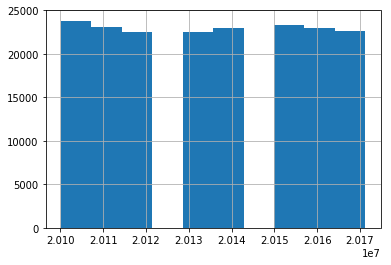

In [28]:
df['datadate'].hist()

In [36]:
# split the data into 40/40/20
sorted_df = df.sort_values(by=['datadate'])
train_df = sorted_df[0:round(0.4 * len(df))]
valid_df = sorted_df[round(0.4 * len(df)):round(0.8 * len(df))]
test_df = sorted_df[round(0.8 * len(df)):len(df)]
train_df.shape, valid_df.shape, test_df.shape

((73541, 44), (73541, 44), (36771, 44))

In [37]:
## TEST SETS
# create array of features, excluding closing stock price
a = np.array(train_df.iloc[:-1, 6]).reshape(-1, 1)
b = np.array(train_df.iloc[:-1, 9:])
X_train = np.concatenate((a, b), axis=1)  # features
# array of labels
y_train = np.array(train_df.iloc[1:, 8]).reshape(-1, 1)  # monthly returns

## VALIDATION SETS
a1 = np.array(valid_df.iloc[:-1, 6]).reshape(-1, 1)
b1 = np.array(valid_df.iloc[:-1, 9:])
X_valid = np.concatenate((a1, b1), axis=1)
y_valid = np.array(valid_df.iloc[1:, 8]).reshape(-1, 1)

## Test SETS
a2 = np.array(test_df.iloc[:-1, 6]).reshape(-1, 1)
b2 = np.array(test_df.iloc[:-1, 9:])
X_test = np.concatenate((a2, b2), axis=1)
y_test = np.array(test_df.iloc[1:, 8]).reshape(-1, 1)

In [38]:
## NORMALISE THE DATA
# function to normalise a 2d array
def normalise(X):
    X_norm = (X - X.mean(axis=1).reshape(-1, 1)) / X.std(axis=1).reshape(-1, 1)
    return X_norm


X_train = normalise(X_train)
X_valid = normalise(X_valid)
X_test = normalise(X_test)

# check
X_train, X_train.shape

(array([[-0.54138874,  2.086162  ,  2.95624019, ..., -0.54138401,
         -0.54147354, -0.54147599],
        [-0.14633685,  0.10103067,  0.10183139, ..., -0.14632784,
         -0.14649858, -0.14650324],
        [-0.45756549,  0.95398842,  3.45013609, ..., -0.45761477,
         -0.45762081, -0.45762098],
        ...,
        [-0.39931867,  0.18291585,  3.22998231, ..., -0.3993611 ,
         -0.39935182, -0.39935221],
        [-0.37620736,  0.77493083,  1.71327544, ..., -0.37620678,
         -0.37616179, -0.37616368],
        [-0.203332  ,  0.28962276,  0.35625935, ..., -0.20333014,
         -0.20318828, -0.20319425]]), (73540, 36))

# 1 Understanding the data

Start with a LASSO regression  of one-month ahead stock returns on the firm-level and macroeconomic variables, tune the hyperparameter using the validation set.

Which variables are important? Are those the variables you expected?

Are there other asset classes and sample periods for which you would/would not expect those relationships to hold?

In [54]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np


# build model
def build_models(x, y):
#     alpha_range = np.linspace(0,0.5,200)
    alpha_range = np.linspace(0, 0.001, 10)

    model = Lasso(normalize=True)
    coeffiecients = []
    # fit model for each alpha
    for alpha in alpha_range:
        model.set_params(alpha=alpha)
        model.fit(x, y)
        coeffiecients.append(model.coef_)
        # print coeffiecients
    coeff_path(alpha_range, coeffiecients)


# view coef
def view_model(model):
    print("\n model coeffiecients")
    print("======================")
    for i, coef in enumerate(model.coef_):
        print("\t coefficient %d %0.3f" % (i + 1, coef))
    print("\n\t intercept %0.3f" % (model.intercept_))


# evaluate model
def model_worth(true_y, predicted_y):
    print ("\t mean squared error = %0.2f\n" % \
    (mean_squared_error(true_y,predicted_y)) )


# plot coef with alpha
def coeff_path(alpha_range, coeffiecients):
    plt.close('all')
    plt.cla()
    plt.figure(1)
    plt.xlabel("Alpha Values")
    plt.ylabel("coeffiecient weights for different alpha values")
    plt.plot(alpha_range, coeffiecients)
    plt.axis('tight')
    plt.show()


def get_coef(x, y, alpha):
    model = Lasso(normalize=True, alpha=alpha)
    model.fit(x, y)
    coefs = model.coef_
    indices = [i for i, coef in enumerate(coefs) if abs(coef) > 0.0]
    return indices

In [11]:
# data = load_boston()
# x = data['data']
# y = data['target']
# x.shape,y.shape

((506, 13), (506,))

In [39]:
x, y = X_train, y_train.reshape(-1)
x.shape,y.shape

((73540, 36), (73540,))

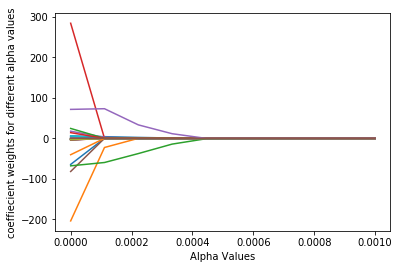


predicting using all the variables

	 mean squared error = 428.64



In [58]:
build_models(x, y)

print("\npredicting using all the variables\n")
full_model = LinearRegression(normalize=True)
full_model.fit(x, y)
predicted_y = full_model.predict(x)
model_worth(y, predicted_y)

In [131]:
print("\n models at different alpha values\n")
# alpa_values = [0.22, 0.08, 0.01]
alpa_values = [0.0004, 0.0002,0.0001]
for alpha in alpa_values:
    indices = get_coef(x, y, alpha)
    print("\t alpha = %0.4f number of variables selected = %d" % (alpha, len(indices)))  # check coef
    print("\t attributes include: ", indices)  # check index
    print("\t attributes names: ", np.array(list(train_df))[indices] )  # check index
    x_new = x[:, indices]
    model = LinearRegression(normalize=True)
    model.fit(x_new, y)
    predicted_y = model.predict(x_new)
    model_worth(y, predicted_y)


 models at different alpha values

	 alpha = 0.0004 number of variables selected = 6
	 attributes include:  [9, 10, 12, 19, 20, 22]
	 attributes names:  ['act' 'at' 'dlc' 'ni' 'sale' 'mkvalt']
	 mean squared error = 453.62

	 alpha = 0.0002 number of variables selected = 10
	 attributes include:  [9, 10, 12, 13, 17, 19, 20, 22, 34, 35]
	 attributes names:  ['act' 'at' 'dlc' 'dltt' 'invt' 'ni' 'sale' 'mkvalt' 'BAA' 'lty']
	 mean squared error = 449.18

	 alpha = 0.0001 number of variables selected = 17
	 attributes include:  [4, 7, 9, 10, 12, 13, 14, 17, 19, 20, 21, 22, 23, 24, 30, 34, 35]
	 attributes names:  ['year' 'prccm' 'act' 'at' 'dlc' 'dltt' 'dvt' 'invt' 'ni' 'sale' 'xrd'
 'mkvalt' 'R&D_to_Market_Cap' 'R&D_to_Sales' 'E12' 'BAA' 'lty']
	 mean squared error = 429.59



# 2 Training neural networks

Train a neural network to predict one-month ahead returns. Using the validation set, tune the model by modifiying the architecture, and regularisation procedures. Regularisation will be important here because you do not have a huge dataset.

Follow geometric pyramid rule from Masters (1993) for hidden layers and number of neurons. Run many different specifications.

Which model performs best OOS?

Compare to second best model.

Compare to LASSO.

Which variables are important and how do they differ from LASSO model? Give economic interpretation.

#### Variables

We have chosen to closing stock price (prccm) but kept dividends per share, in line with Goyal and Welch's choice to use the dividend per price ratio as a predictor of stock returns, which showed good results both in-sample, and out-of-sample (but poor performance over past 30 years). This means we have a total of 36 features, and we will attempt to predict "trt1m" one-month ahead, the stock level monthly total return.

#### Network architecture

Following the geometric pyramid rule, given $m$ input nodes and $n$ output nodes, we should use $\sqrt{m\cdot n}$ hidden units, for one hidden layer.

In general, for number of hidden layers, $l$, the geometric ratio from layer to layer is $r=\sqrt[l+1]{\frac{n}{m}}$, and we have rounded to the nearest integer where necessary.

- The number of layers, $l$, we will use are $l=\{1,2,3,4,5\}$
- Therefore, the number of hidden units is $n^{(j)}=\{6, (11,3), (15,6,2), (18,9,4,2), (20,11,6,3,2)\}$, with 36 and 1 always serving as the number of input and output units respectively.

We will use the rectified linear unit (relu) for the activation function, with a linear output layer.

#### Network regularisation

Usually, only one hidden layer is enough, and the larger amount of hidden layers is likely to lead to overfitting, especially with as little as data as we have. We will use the **L1 penalty, early stopping and batch normalization** for regularisation procedures, but if there is no great improvement in results moving from 2 to 3 hidden layers, we will try L2 and dropout.

#### Network optimisation

For optimisation procedures, we will utilise **Adam** - adaptive movement estimation, which combines momentum (taking weighted average of previous steps, smoothing gradient) and RMSProp which avoids oscillations in direction of previously large steps. We will use the coefficients for the Adam procedure provided in the original research paper and may alter depending on the learning curve.

#### Keras

We will be using the Keras API within the TensorFlow environment in order to train and validate the neural networks as scikit-learn is not the most suitable environment for larger neural networks, with no GPU support.

## 2.1 Producing learning curves

Producing learning curves is important in being able to diagnose whether our preliminary neural networks are underfitting or overfitting, which we can then tune hyperparameters and use different optimisation and regularisation techniques

After we have identified the factors contributing to over and underfitting we can then predict monthly stock returns on the test set using the validated model.

In [129]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import set_random_seed
set_random_seed(123)

print(tf.__version__) # ensure it was imported correctly

1.13.1


In [131]:
# first define functions which are our five different neural networks
# these will be the geometrically sequenced layers described above
## l1 penalty, early stopping and batch normalization

def NN1():
    # first we build the architecture, 36, 6, 1 for 1 hidden layer
    model = keras.Sequential([
        layers.Dense(36, activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        layers.Dense(6, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    # adam optimiser with learning rate 0.001 at first, can change this if poor learning curve
    optimiser = tf.keras.optimizers.Adam(0.001)
    
    # compile the model, using mean squared error loss and adam optimzer
    model.compile(loss='mean_squared_error',
                        optimizer=optimiser,
                        metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

def NN2():
    # first we build the architecture, 36, 11, 3, 1 for 2 layers
    model = keras.Sequential([
        layers.Dense(36, activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        layers.Dense(11, activation=tf.nn.relu),
        layers.Dense(3, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    # adam optimiser with learning rate 0.001 at first, can change this if poor learning curve
    optimiser = tf.keras.optimizers.Adam(0.001)
    
    # compile the model, using mean squared error loss and adam optimzer
    model.compile(loss='mean_squared_error',
                        optimizer=optimiser,
                        metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

def NN3():
    # first we build the architecture, 36, 6, 1 for 1 hidden layer
    model = keras.Sequential([
        layers.Dense(36, activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        layers.Dense(15, activation=tf.nn.relu),
        layers.Dense(6, activation=tf.nn.relu),
        layers.Dense(2, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    # adam optimiser with learning rate 0.001 at first, can change this if poor learning curve
    optimiser = tf.keras.optimizers.Adam(0.001)
    
    # compile the model, using mean squared error loss and adam optimzer
    model.compile(loss='mean_squared_error',
                        optimizer=optimiser,
                        metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

def NN4():
    # first we build the architecture, 36, 6, 1 for 1 hidden layer
    model = keras.Sequential([
        layers.Dense(36, activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        layers.Dense(18, activation=tf.nn.relu),
        layers.Dense(9, activation=tf.nn.relu),
        layers.Dense(4, activation=tf.nn.relu),
        layers.Dense(2, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    # adam optimiser with learning rate 0.001 at first, can change this if poor learning curve
    optimiser = tf.keras.optimizers.Adam(0.001)
    
    # compile the model, using mean squared error loss and adam optimzer
    model.compile(loss='mean_squared_error',
                        optimizer=optimiser,
                        metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

def NN5():
    # first we build the architecture, 36, 6, 1 for 1 hidden layer
    model = keras.Sequential([
        layers.Dense(36, activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        layers.Dense(20, activation=tf.nn.relu),
        layers.Dense(11, activation=tf.nn.relu),
        layers.Dense(6, activation=tf.nn.relu),
        layers.Dense(3, activation=tf.nn.relu),
        layers.Dense(2, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    # adam optimiser with learning rate 0.001 at first, can change this if poor learning curve
    optimiser = tf.keras.optimizers.Adam(0.001)
    
    # compile the model, using mean squared error loss and adam optimzer
    model.compile(loss='mean_squared_error',
                        optimizer=optimiser,
                        metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

In [48]:
model1=NN1()
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 36)                1332      
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 222       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 7         
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
_________________________________________________________________


In [49]:
# begin training the model by feeding it the observations

# first ensure the model has sensible outputs

testing=model1.predict(X_train[:10])
testing

array([[1.610764  ],
       [0.8295245 ],
       [1.1282369 ],
       [0.3697507 ],
       [0.567529  ],
       [0.61109173],
       [0.66483223],
       [0.38041025],
       [0.37444943],
       [0.9201956 ]], dtype=float32)

In [50]:
# now train for a large number of epochs
# then we can visualise it and change the number of epochs, implementing early stopping

# will print a . at the end of each epoch, uses less space, ensures we know the code is still running
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

# the default batch size is 32 # i.e. mini-batch gradient descent with batch size 32
results_1layer = model_1layer.fit(
                X_train, y_train,
                epochs=1000, validation_data = (X_valid, y_valid), 
                verbose=0, callbacks=[PrintDot()]
                )
# 1 hour computation time, consider lower epochs depending on learning curve


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [51]:
results_1layer_df = pd.DataFrame(results_1layer.history)
results_1layer_df['epoch'] = results_1layer.epoch # match the epoch to each row
results_1layer_df.tail() # show final entries of the table

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,444.659210,10.043618,444.659058,472.846500,10.216919,472.846558,995
996,438.529467,10.053766,438.529449,473.586865,10.261267,473.587372,996
997,439.775239,10.095088,439.775116,471.249283,10.236081,471.249542,997
998,446.863047,10.041858,446.863068,472.895715,10.285636,472.895508,998
999,442.909589,10.029892,442.909668,472.082886,10.233306,472.082825,999


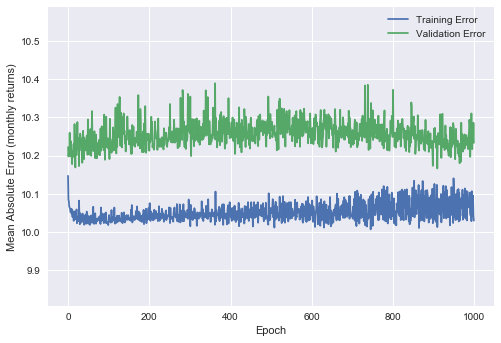

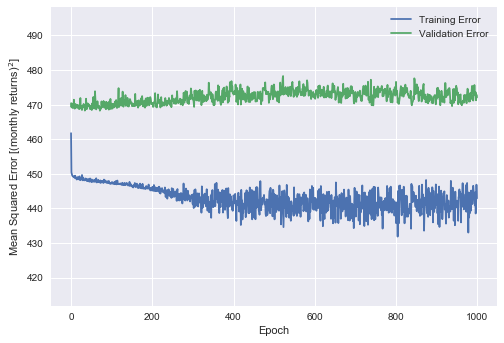

In [75]:
# Create a function that will be able to plot the results from future neural networks

def plot_learning_curves(model):
  results = pd.DataFrame(model.history)
  results['epoch'] = model.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error (monthly returns)')
  plt.plot(results['epoch'], results['mean_absolute_error'],
           label='Training Error')
  plt.plot(results['epoch'], results['val_mean_absolute_error'],
           label = 'Validation Error')
  plt.ylim([results.mean_absolute_error.min()-0.2,results.val_mean_absolute_error.max()+0.2])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Error [(monthly returns)$^2$]')
  plt.plot(results['epoch'], results['mean_squared_error'],
           label='Training Error')
  plt.plot(results['epoch'], results['val_mean_squared_error'],
           label = 'Validation Error')
  plt.ylim([(results.mean_squared_error.min()-20),results.val_mean_squared_error.max()+20]) # limit the axes to max values
  plt.legend()
  plt.show()

plot_learning_curves(results_1layer)

## 2.2 Analysis of learning curves
Before we move on to diagnosing our neural network and trying out different optimisations and regularisations based on the suggestions of the learning curve, we can use the initial values and architecture here as our "baseline" model, and see if our improvements to optimisation and regularisation actually have any effect on the test error. Prior to testing our "baseline" models, we can rule out certain things that we were going to test, based on these results.

The first thing we can do straight way, **is eliminate the testing of neural networks with hidden layers $4$ and $5$**, because our **learning curves show that there is a severe case of overfitting**, and many literature cite that 3 hidden layers has more than enough capacity for most prediction tasks, especially considering the relatively low number of observations in our data. We can tell the overfitting from our learning curve from a few observations. First, let's zoom in on different epochs to see if we can pinpoint where the overfitting occurs.

In [114]:
# Zooming in on different epochs to analyse the curves

def plot_learning_curves_20epochs(model):
  results = pd.DataFrame(model.history)
  results['epoch'] = model.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error (monthly returns)')
  plt.plot(results['epoch'][0:20], results['mean_absolute_error'][0:20],
           label='Training Error')
  plt.plot(results['epoch'][0:20], results['val_mean_absolute_error'][0:20],
           label = 'Validation Error')
  plt.ylim([results['mean_absolute_error'][0:20].min()-0.2,results['val_mean_absolute_error'][0:20].max()+0.2])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Error [(monthly returns)$^2$]')
  plt.plot(results['epoch'][0:20], results['mean_squared_error'][0:20],
           label='Training Error')
  plt.plot(results['epoch'][0:20], results['val_mean_squared_error'][0:20],
           label = 'Validation Error')
  plt.ylim([(results['mean_squared_error'][0:20].min()-5),(results['val_mean_squared_error'][0:20].max()+5)]) # limit the axes to max values
  plt.legend()
  plt.show()

def plot_learning_curves_100epochs(model):
  results = pd.DataFrame(model.history)
  results['epoch'] = model.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error (monthly returns)')
  plt.plot(results['epoch'][0:100], results['mean_absolute_error'][0:100],
           label='Training Error')
  plt.plot(results['epoch'][0:100], results['val_mean_absolute_error'][0:100],
           label = 'Validation Error')
  plt.ylim([results['mean_absolute_error'][0:100].min()-0.2,results['val_mean_absolute_error'][0:100].max()+0.2])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Error [(monthly returns)$^2$]')
  plt.plot(results['epoch'][0:100], results['mean_squared_error'][0:100],
           label='Training Error')
  plt.plot(results['epoch'][0:100], results['val_mean_squared_error'][0:100],
           label = 'Validation Error')
  plt.ylim([(results['mean_squared_error'][0:100].min()-5),(results['val_mean_squared_error'][0:100].max()+5)]) # limit the axes to max values
  plt.legend()
  plt.show()

def plot_learning_curves_500epochs(model):
  results = pd.DataFrame(model.history)
  results['epoch'] = model.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error (monthly returns)')
  plt.plot(results['epoch'][0:500], results['mean_absolute_error'][0:500],
           label='Training Error')
  plt.plot(results['epoch'][0:500], results['val_mean_absolute_error'][0:500],
           label = 'Validation Error')
  plt.ylim([results.mean_absolute_error.min()-0.2,results.val_mean_absolute_error.max()+0.2])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Error [(monthly returns)$^2$]')
  plt.plot(results['epoch'][0:500], results['mean_squared_error'][0:500],
           label='Training Error')
  plt.plot(results['epoch'][0:500], results['val_mean_squared_error'][0:500],
           label = 'Validation Error')
  plt.ylim([(results.mean_squared_error.min()-20),results.val_mean_squared_error.max()+20]) # limit the axes to max values
  plt.legend()
  plt.show()

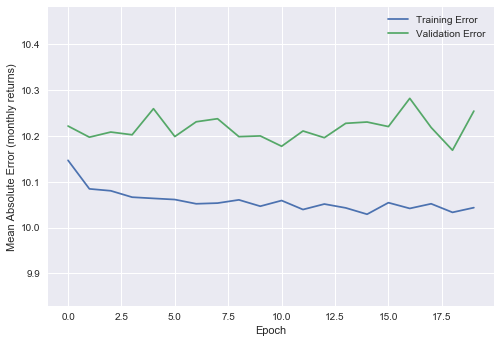

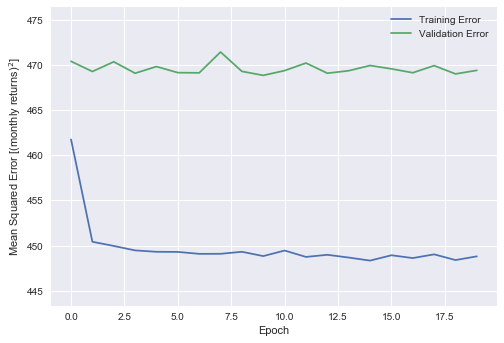

In [116]:
# zoom in on 20 epochs
plot_learning_curves_20epochs(results_1layer)

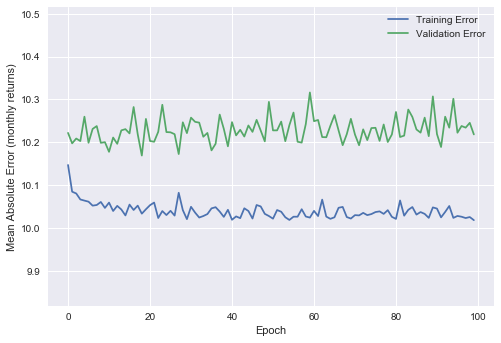

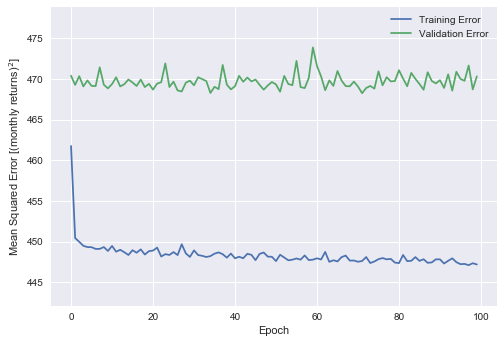

In [115]:
# zoom in on 100 epochs
plot_learning_curves_100epochs(results_1layer)

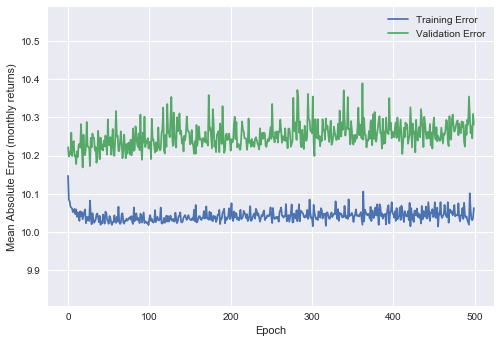

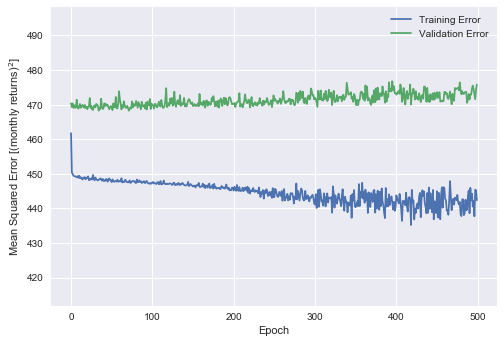

In [88]:
# zoom in on 500 epochs
plot_learning_curves_500epochs(results_1layer)

We want our model to have predictive power out of sample, on data it hasn't seen. Therefore, it should be able to be generalised, rather than fitting tightly to the training data and having poor translation to other data sets, i.e. we want to reduce the variance to a reasonable level. However, we also do not want a high bias, so we want to avoid underfitting our model.

The observations pointing towards the overfitting of our one layer baseline model and its high capacity are:

+ **The training error drops very quickly (in 1 single epoch) and then slowly falls**
    - This is especially in the case of the mean squared error. The training error dramatically dropping in 1 epoch indicates that the model was able to fit the training data very well, very quickly, so the fact it was training on the data for another 999 epochs, with slowly decreasing MSE until it plateaus (with noise), is a characteristic of an overfit model
    - We can see this decrease effect continue until around 250 epochs where the noise increases and the training loss begins to plateau, which could be smoothed by better optimisation such as decaying the learning rate so that the local minima is not "jumped over" during the descent process.

+ **The validation error is markedly different from the training error, and rises from the very first epochs**
    - For a well fit model, the validation error should drop, and then plateau, joining with the training error curve - this would indicate that even though the model was not trained on the validation set, it still obtained a similar, good level of accuracy so that the model has good generalisation power, and has a good level of accuracy (equal to that of the training data, which the model will fit well, as neural networks have high complexity, they should learn the training data to a very high accuracy)
    - However, in these curves, even zooming in on the first few epochs, we see a noisy validation error, and looking at the learning curve for 500 epochs, the validation curve is constantly rising, suggesting it is being overfit
    - If the validation curve rises, after being at a minimum, it suggests it has already been fit as well as it can (at the minimum) and thus at any further epochs, the model is being overfit, and the training process should be stopped
    - However, it is difficult to identify a local minima, so we must be cautious and bear in mind that the validation set may simply not be similar to the training set and drawn from different distributions - in other words the chronology has had a noticeable effect on the training process. If this continues after applying optimisation and regularisation techniques (the latter designed to prevent overfitting), then nested cross-validation should be considered to improve validation accuracy while respecting chronology
    
Nevertheless, for now, we can conclude that **the one layer, baseline neural network has overfit the data, and so we can discard the training of neural networks with hidden layers $4$ and $5$** (where baseline model refers to no tweaking of the optimisation or regularisation procedures, only Adam ($\alpha=0.001$) and `batch_size=32`). It's also very likely the neural network with hidden layers 2 and 3 will overfit too, but first we should focus on optimising and regularising our baseline model, and make a decision from there.

## 2.3 Making predictions with our baseline models

Again, before we even begin the optimisation and regularisation of our improved (not baseline) models, we can deduce that we should probably include early stopping considering how quickly our validation error rose, so we will be using the `EarlyStopping` callback in our NN2 and NN3 models, which will stop the training if a set amount of epochs passes without improvement in validation error.

In [132]:
model2=NN2()
model2.summary()

model3=NN3()
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 36)                1332      
_________________________________________________________________
dense_10 (Dense)             (None, 11)                407       
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 36        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 4         
Total params: 1,779
Trainable params: 1,779
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 36)                1332      
_________________________________________________________________
dense_14

In [153]:
# first train baseline model #2

# set patience to 20, default is 10, but validation error was very noisy
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# the default batch size is 32 # i.e. mini-batch gradient descent with batch size 32
results_2layer = model2.fit(
                X_train, y_train,
                epochs=1000, validation_data = (X_valid, y_valid), 
                verbose=0, callbacks=[PrintDot()]
                )


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [154]:
# then baseline mode #3

# the default batch size is 32 # i.e. mini-batch gradient descent with batch size 32
results_3layer = model3.fit(
                X_train, y_train,
                epochs=1000, validation_data = (X_valid, y_valid), 
                verbose=0, callbacks=[PrintDot()]
                )


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

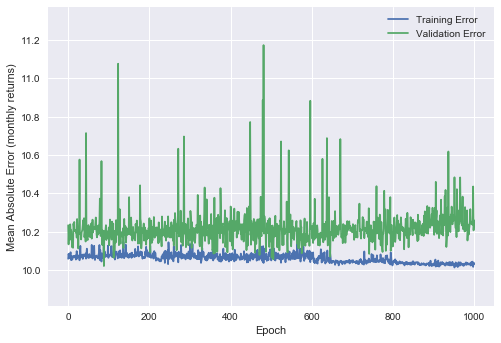

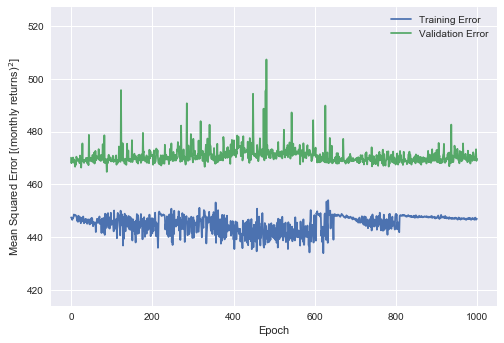

In [155]:
plot_learning_curves(results_2layer)

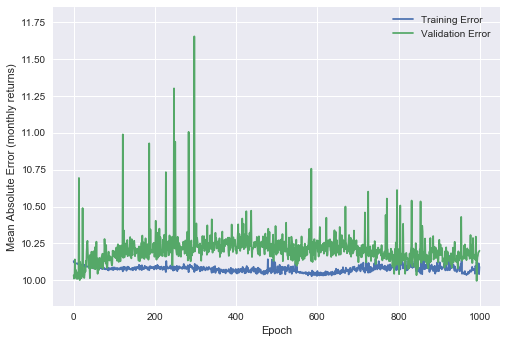

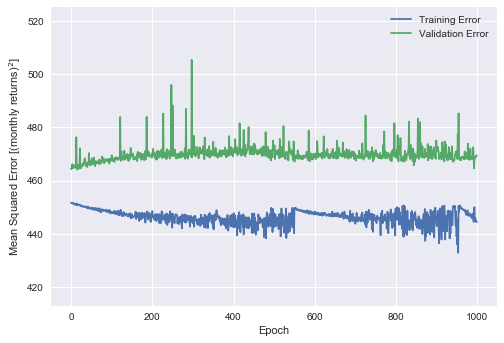

In [156]:
plot_learning_curves(results_3layer)

### $R^2$ graphs and economic significance

### Comparing results to LASSO, briefly

# 3 Including past returns as predictors

Add up to 3 months of past returns as predictors. Tune model and hyperparameters with validation set.

Do predictions improve? Economic interpretation of results.

In [157]:
results_1layer_df['mean_squared_error'].min()

431.8523864746094

# Improvements

### Month Forward-Chaining: Nested Cross-Validation

Since we have a time-series, we have to cross-validate in a different manner to preserve chronology. A method of doing so comes from nested cross-validation techniques.

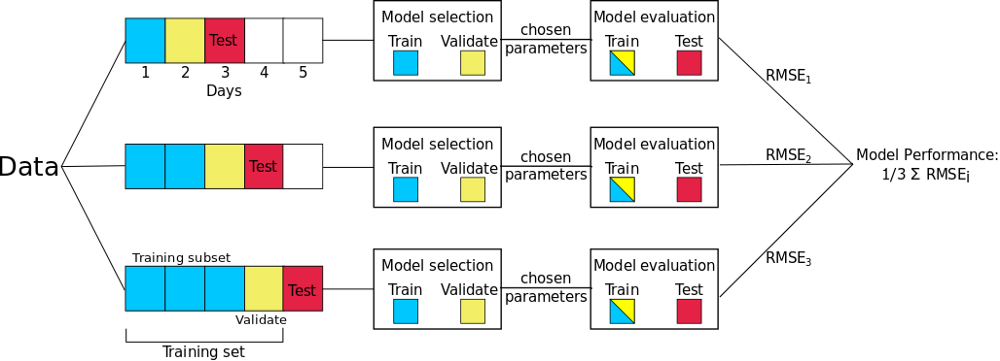

In our dataset, we have 183853 different observations, with a reasonable distribution of dates (`df['datadate'].value_counts()` and `df['datadate'].hist()` both indicate this), and so this provides an alternative way of reducing the variance.

Firstly, we split the observations into fifths. Then we assign the first 20% as the training set, and the next 20% as the validation, and the subsequent 20% as the test set. Using these sets, we train and validate the models, as normal, and then evaluate them on the final test set. Then we capture more of the data, assigning the first 40% to the training set, the next 20% to the validation set, and the subsequent 20% to the test set, and repeat the training and evaluation. Finally, we assign the first 40% to the training set, the next 40% to the test set, and the final 20% to the test set.

In this case we have preserved the size of the test set. We can also shrink these proportions to allow for more than 3 splits, for example, 10/10/10 then 20/20/10, then 30/30/10, etc.

This would help to reduce the variance of our model and better generalise our model to improve its predictive power.